In [6]:
class DFSResult:
    parent = {}
    start_time = {}
    finish_time = {}
    edges = {}  # Edge classification for directed graph.
    order = [] # for topological sort
    t = 0


### DFS

In [2]:
def dfs(adj, v, results):
    # only when we use this to perform dfs from a starting node
    if not results.parent:
        results.parent[v] = None

    for n in adj[v]: #checking neighbours of v
        if n not in results.parent:
            results.parent[n] = v
            dfs(adj, n, results)


### Full Graph DFS

In [3]:
def full_graph_dfs(adj):
    results = DFSResult()
    for v in adj.keys():
        if v not in results.parent:
            results.parent[v] = None
            dfs(adj, v, results)
    return results


### Topological sort

In [4]:
def dfs(adj, v, results):
    if not results.parent:
        results.parent[v] = Non
    #checking neighbours of v
    for n in adj[v]: 
        if n not in results.parent:
            results.parent[n] = v
            dfs(adj, n, results)
            
            
    # we're done visiting a node only when we're done visiting 
    # all of its descendents first
    results.order.append(v)


In [5]:
def full_graph_dfs(adj):
    results = DFSResult()
    for v in adj.keys():
        if v not in results.parent:
            results.parent[v] = None
            dfs(adj, v, results)
            

    return list(reversed(results.order))

### Edge classification

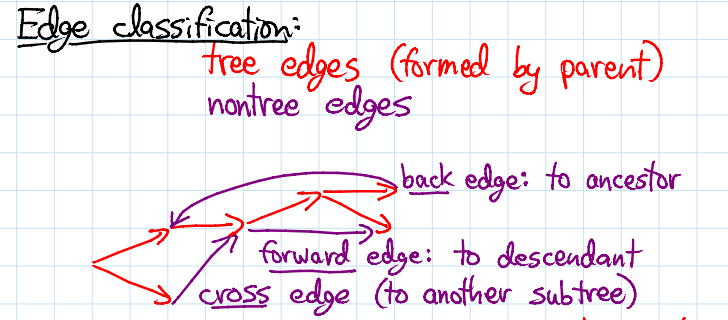

#### Parenthesis theorem

In any depth-first search of a (directed or undirected) graph, for any
two vertices u and v , exactly one of the following three conditions holds:

* the intervals [u.start, u.finish] and [v.start, v.finish] are entirely disjoint, and neither u nor v is a descendant of the other in the depth-first forest 


 
* the interval [u.start, u.finish] is contained entirely within the interval [v.start, v.finish] and u is a descendant of v in a depth-first tree 



* the interval [v.start, v.finish] is contained entirely within the interval [u.start, u.finish], and v is a descendant of u in a depth-first tree. 


basically, node vi will not finish processing until all its neighbors finish processing.

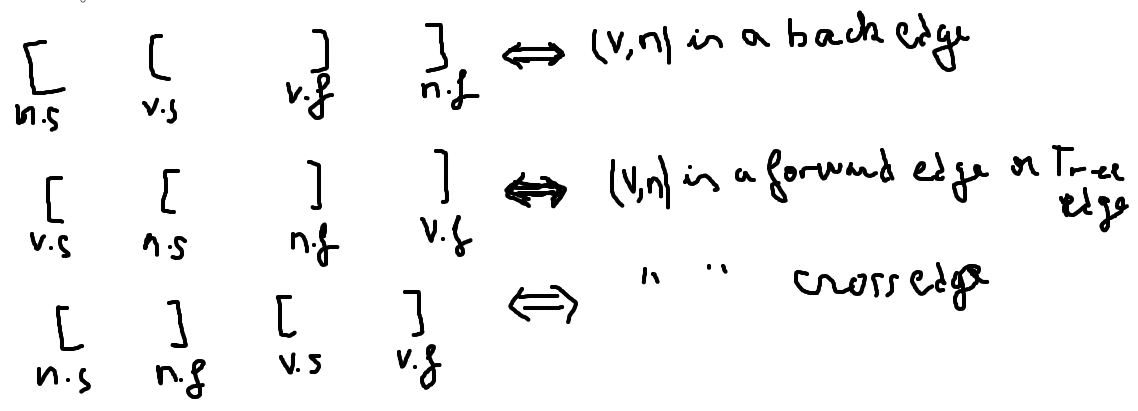

In [7]:
def dfs(adj, v, results):
    if not results.parent:
        results.parent[v] = None

    results.t += 1
    results.start_time[v] = results.t

    for n in adj[v]:
        if n not in results.parent:
            results.parent[n] = v
            results.edges[(v, n)] = "tree"
            dfs(adj, n, results)

        elif n not in results.finish_time:  # if n was seen before and has not finished yet
            results.edges[(v, n)] = "back"

        elif results.start_time[v] < results.start_time[n]:  # if n has started after v (and finished before v)
            results.edges[(v, n)] = "forward"

        else:
            results.edges[(v, n)] = "cross"  # if n has started and finished before v even started
    
    results.t += 1
    results.finish_time[v] = results.t


### Cycle detection

a graph (directed or undirected) has a cycle iff it has a back edge.

In [2]:
def dfs(adj, v, results):
    if not results.parent:
        results.parent[v] = None

    results.t += 1
    for n in adj[v]:
        if n not in results.parent:
            results.parent[n] = v
            if dfs(adj, n, results):
                return True

        elif n not in results.finish_time:  # if n was seen before and has not finished yet
            return True
    
    
    results.t += 1
    results.finish_time[v] = results.t
    return False

In [ ]:
def full_graph_dfs(adj):
    results = DFSResult()
    for v in adj.keys():
        if v not in results.parent:
            results.parent[v] = None
            if dfs(adj, v, results):
                return True
    return False
